Here is the training of model to recognize handwritten digits using the MNIST dataset. 
It is very similar to previous task models, becuase neural network working with raw bytes, and it is really cool.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
from torch import optim

input_size = 28*28  # Image size in pixels
hidden_size = 500  # Number of neurons in the hidden layer
num_classes = 10  # Number of classes to recognize (10 digits)
n_epochs = 2  # Number of epochs
batch_size = 4  # Mini-batch size of input data
lr = 0.01  # Learning rate


# Lets download dataset
mnist_trainset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Training data loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=batch_size, shuffle=True)  
# Test data loader
test_loader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=batch_size, shuffle=False)  

# Init device as usual
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# OUr standard "training step" func, alike we used before
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

model = torch.nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)
)
model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)
        loss = train_step(images, labels)
    print(epoch)

print(model.state_dict())
print(loss)

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total))


Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000
10000
0
1
OrderedDict({'0.weight': tensor([[-0.0089, -0.0141, -0.0111,  ..., -0.0103,  0.0233,  0.0006],
        [-0.0191,  0.0107, -0.0324,  ...,  0.0117, -0.0119,  0.0166],
        [-0.0314,  0.0271, -0.0139,  ...,  0.0126, -0.0114, -0.0041],
        ...,
        [-0.0137, -0.0068,  0.0204,  ...,  0.0154,  0.0129,  0.0216],
        [ 0.0353, -0.0192, -0.0110,  ...,  0.0341,  0.0288,  0.0015],
        [-0.0207,  0.0344, -0.0196,  ..., -0.0203,  0.0045, -0.0102]]), '0.bias': tensor([-1.2590e+00, -1.2245e-01, -8.3743e-01, -9.3340e-02, -9.0592e-02,
        -6.1734e-02, -1.1173e+00, -3.0627e-01, -1.8500e-01, -2.9571e-01,
        -1.4194e-01, -3.9010e-01, -4.5114e-02, -3.7641e-01, -5.0299e-01,
        -3.3815e-01, -6.7501e-02, -5.3981e-01, -5.8186e-02, -2.9449e-02,
        -7.2155e-02, -1.3848e+00, -3.6542e-02, -1.6157e-01, -6.5552e-02,
        -7.1398e-02, -1.9690e+00, -2.9253e-02, -3.3262e-01, -5.5732e-02,
 

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)

It is really good for two epochs to have ~90% accuracy! Running code snippet above we should get at the end something like:
```
0.4808143675327301
Accuracy: 92.18 %
```

---

Well, lets improve it somehow.
Lets define some сhallenges we can throw at ourselves.
1. We could try to improve the accuracy of our model, by playng with these things:
- Increase the number of epochs.
- Increase the number of neurons.
- Add new hidden layers.
- Change the mini-batch size.

2. And also lets try to find a way to visualize the model’s performance on test data


Epoch [1/5], Loss: 0.2660
Epoch [2/5], Loss: 0.1090
Epoch [3/5], Loss: 0.2167
Epoch [4/5], Loss: 0.0704
Epoch [5/5], Loss: 0.0183
OrderedDict({'0.weight': tensor([[-0.0230,  0.0012,  0.0223,  ..., -0.0311,  0.0031,  0.0296],
        [ 0.0332, -0.0216, -0.0337,  ...,  0.0351, -0.0039, -0.0127],
        [ 0.0053, -0.0098, -0.0282,  ..., -0.0049, -0.0145,  0.0188],
        ...,
        [ 0.0126, -0.0135,  0.0235,  ..., -0.0308,  0.0354, -0.0079],
        [-0.0028, -0.0032,  0.0217,  ..., -0.0353, -0.0010, -0.0015],
        [ 0.0217, -0.0312,  0.0089,  ..., -0.0137,  0.0163,  0.0135]]), '0.bias': tensor([ 0.0743, -0.1348,  0.0040, -0.0557,  0.0136, -0.0591,  0.0211, -0.0272,
         0.0647, -0.1200,  0.0223,  0.0196, -0.0253, -0.0975, -0.0706, -0.0680,
         0.0129,  0.1218, -0.0638, -0.0372, -0.0295,  0.0613,  0.0047,  0.0461,
        -0.0768, -0.0544,  0.0153, -0.0668,  0.0500, -0.0770, -0.0546, -0.0364,
        -0.0355, -0.0706, -0.0323,  0.0116, -0.0093,  0.0352, -0.0265, -0.0048,


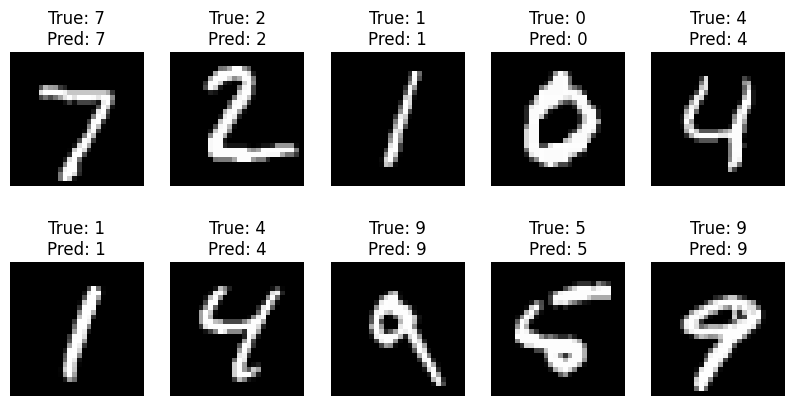

In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
from torch import optim
import matplotlib.pyplot as plt

# Hyperparameters
input_size = 28*28  # Image size in pixels
hidden_size = 500  # Number of neurons in the hidden layer
num_classes = 10  # Number of classes to recognize (10 digits)
n_epochs = 5  # Number of epochs
batch_size = 32  # Mini-batch size of input data
lr = 0.001  # Learning rate

# Download dataset
mnist_trainset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=batch_size, shuffle=False)

# Init device as usual
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Standard "training step" function
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

# Model definition
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)
)
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
train_step = make_train_step(model, loss_fn, optimizer)

# Training loop
train_losses = []
for epoch in range(n_epochs):
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        loss = train_step(images, labels)
        train_losses.append(loss)
    print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss:.4f}')

# Print model state dict and loss
print(model.state_dict())
print(f'Final Loss: {loss:.4f}')

# Evaluate model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f} %')

# Save model
torch.save(model, 'mnist_full.pt')
model = torch.load('mnist_full.pt')
model.eval()

# Visualize the model's performance on test data
def plot_images(images, labels, preds):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {labels[i]}\nPred: {preds[i]}')
        plt.axis('off')
    plt.show()

# Get some test data
data_iter = iter(test_loader)
images, labels = next(data_iter)
images = images.reshape(-1, 28*28).to(device)
outputs = model(images)
_, preds = torch.max(outputs.data, 1)

# Plot the images
plot_images(images.cpu(), labels.cpu(), preds.cpu())

Brilliant! We got

```
Final Loss: 0.0183
Accuracy: 97.74 %
```

How we achieved that?
Basically, by applying all the things we studied in the previous lessons.

---

1. We have increased the number of training epochs from 2 to 5, it is not a surprise that it helps to get more accurate model.
2. We are aldo increased the number of model layers. The`hidden_size` stayed the same as 500 but added, we just added an additional layer.
     ```python
     model = nn.Sequential(
         nn.Linear(input_size, hidden_size),
         nn.ReLU(),
         nn.Linear(hidden_size, hidden_size),
         nn.ReLU(),
         nn.Linear(hidden_size, num_classes)
     )
     ```

3. We are also increased `batch_size` from 4 to 32. Larger batches might lead to more stable gradient estimates and faster convergence. But also it is a trade-off with computational resources and training time. But, it trained relatively fast on M1 Pro cpu, so...

4. We are also changed learning rate (`lr`) by decreasing it from 0.01 to 0.001. It allows the model to make more precise updates to the weights.

5. And finany, for visualizing model performace we are used  `matplotlib`. We mapped the original test images, their true labels, and the predicted labels from the model.
